In [46]:
# Import libraries
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read dataset, drop missing values
df = pd.read_csv('data.csv')
df.dropna()
df = df.drop(columns=['id', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 
    'fractal_dimension_se', 'Unnamed: 32'])
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# Selected column names for encoding an scaling
target_column = 'diagnosis'
numerical_columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer

# Initialize encoder, scaler, and normalizer
encoder = LabelEncoder()
scaler = StandardScaler()
normalizer = Normalizer()

# Encode the target column
df[target_column] = encoder.fit_transform(df[target_column])

# Scale the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Normalize the numerical columns to be between 0 and 1
df[numerical_columns] = normalizer.fit_transform(df[numerical_columns])

In [ ]:
# Output the transformed data to .csv
df.to_csv('data_refined.csv', index = False)

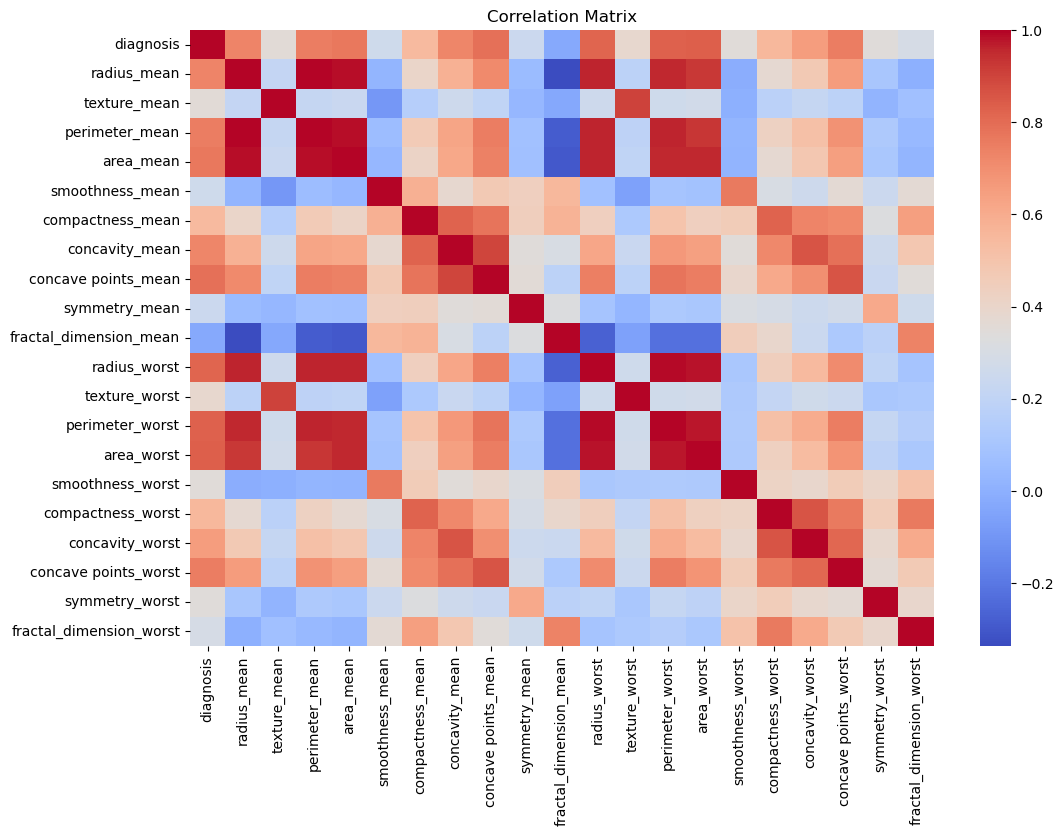

In [ ]:
# Correlation matrix
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Matrix")
plt.show()

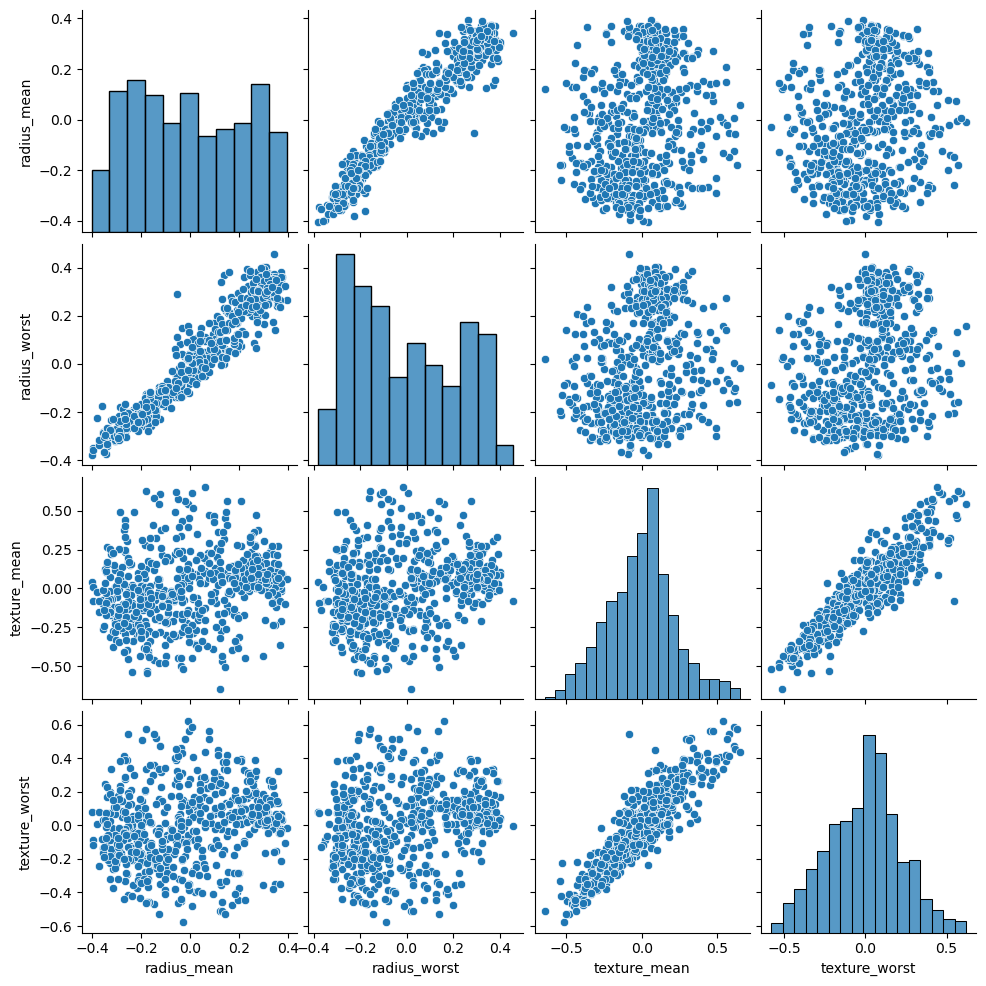

In [ ]:
# Pair plots
selected_features = ['radius_mean', 'radius_worst', 'texture_mean', 'texture_worst' ]
sns.pairplot(df[selected_features])
plt.show()

<Axes: xlabel='diagnosis', ylabel='perimeter_mean'>

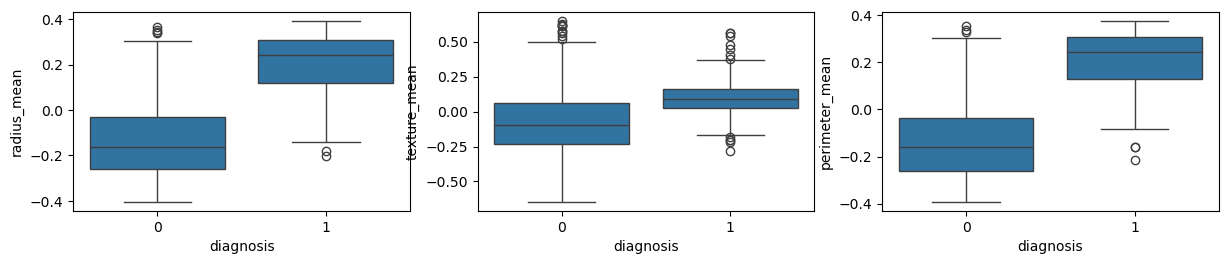

In [ ]:
# Box plots
plt.figure(figsize = (20, 15))
plt.subplot(5, 4, 1)
sns.boxplot(data = df, x = 'diagnosis', y = 'radius_mean')
plt.subplot(5, 4, 2)
sns.boxplot(data = df, x = 'diagnosis', y = 'texture_mean')
plt.subplot(5, 4, 3)
sns.boxplot(data = df, x = 'diagnosis', y = 'perimeter_mean')

<Axes: xlabel='diagnosis', ylabel='perimeter_mean'>

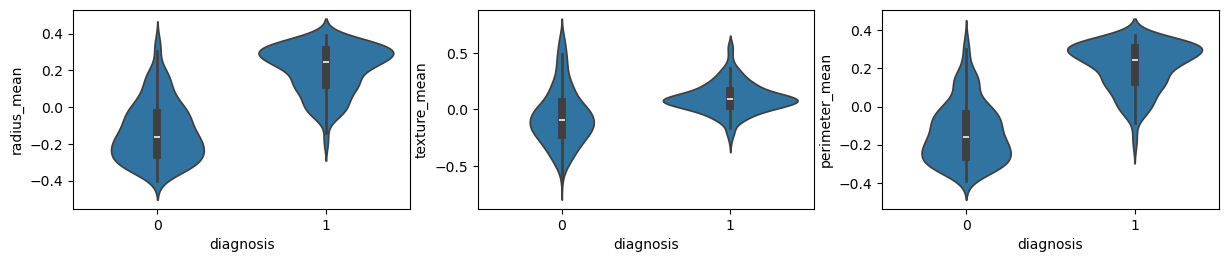

In [71]:
# Violin plots
plt.figure(figsize = (20, 15))
plt.subplot(5, 4, 1)
sns.violinplot(data = df, x = 'diagnosis', y = 'radius_mean')
plt.subplot(5, 4, 2)
sns.violinplot(data = df, x = 'diagnosis', y = 'texture_mean')
plt.subplot(5, 4, 3)
sns.violinplot(data = df, x = 'diagnosis', y = 'perimeter_mean')